# 11.1 Single-factor Anova test and the F test
A single-factor analysis of variance (ANOVA) problem involves a comparison of 𝑘 population or treatment means $\mu_1,\mu_2,⋯,\mu_𝑘$. The objective is to test

Hypothesis:
$𝐻_0: \mu_1 = \mu_2 = ⋯ = \mu_𝑘$
against
$𝐻_𝑎$: At least two of the 𝜇’s are different from each other. 

When comparing populations, the analysis is based on independently selected random samples, one from each population.

Let 
- 𝑘 = number of populations or treatments being compared
- $N = \sum_{i = 1}^{k} n_i$ = the total number observations in the data set
- $T = \sum_{i = 1}^{k} n_i \overline {x}_i$ = sum of all N observations in the data set
- $\overline{\overline{x}} = T/N$ = grand mean

Assumptions:
- Each of the 𝑘 population or treatment response distributions is normal.
- $\sigma_1= \sigma_2= \cdots =\sigma_𝑘$ (The 𝑘 normal distributions have equal standard deviations.) 
- The observations in the sample from any particular one of the 𝑘 populations or treatments are independent of one another. 
- When comparing population means, the samples are independent random samples. When comparing treatment means, experimental units are assigned at random to treatments. 

## Checking normality
- If the sample sizes are reasonably large, normal probability plots or boxplots of the data in each sample are helpful for checking the assumption of normality.
- Often, however, sample sizes are so small that a separate normal probability plot or boxplot for each sample is of little value in checking normality. In this case, a single combined plot can be constructed by first subtracting $\overline{x}_1$ from each observation in the first sample, $\overline{x}_2$ from each value in the second sample, and so on and then constructing a normal probability or boxplot of all 𝑁 deviations from their respective means. The plot should be reasonably straight. 


## Measurement for ANOVA tests:
- SSTr (treatment sum of squares) is a measure of differences **among** the sample means: 
$$SSTr = \sum_{i}^{k} n_i (\overline{x}_i - \overline{\overline{x}})^2$$
- SSe (error sum of squares) is a measure of variability **within** the 𝑘 samples:
$$SSE = \sum_{i}^{k} (n_i - 1)s_i^2$$
Each sum of squares has an associated df: treatment $df_1=𝑘−1$, and error $df_2=𝑁−𝑘$.

A mean square is a sum of squares divided by its df: 
- MStr (mean square for treatments): 
$$MStr=\frac{SSTr}{k-1}$$
- MSE (mean square of error): 
$$MSSE=\frac{SSe}{N-k}$$

When $𝐻_0$ is true, i.e., $\mu_1= \mu_2 = \cdots = \mu_𝑘$,
$\mu_{MSTr}=\mu_{MSE}$.

However, when $𝐻_0$ is false,
$\mu_{MSTr} > \mu_{MSE}$
and the greater the differences among the $\mu$’s, the larger $\mu_{MSTr}$ will be relative to $\mu_{MSE}$.

## 𝐹-distribution
- 𝐹 distributions (https://en.wikipedia.org/wiki/F-distribution) arise in connection with ratios of mean squares. 
- A particular F distribution is obtained by specifying both numerator degrees of freedom ($df_1$) and denominator degrees of freedom ($df_2$). 

## The single-factor ANOVA 𝐹 test

Hypothesis:
$𝐻_0: \mu_1 = \mu_2 = ⋯ = \mu_𝑘$
against
$𝐻_𝑎$: At least two of the 𝜇’s are different from each other. 

Test statistic: 
$$𝐹=MSTr/MSE.$$
When $𝐻_0$ is true and the ANOVA assumptions are reasonable, 𝐹 has an 𝐹 distribution with $df_1=𝑘−1$ and $df_2=𝑁−𝑘$.
The 𝑃-value is the area captured in the upper tail of the corresponding 𝐹 curve.

## The fundamental identity for single-factor ANOVA 

- SSto (total sum of squares), denoted by SSTo, is given by
$$SSto = \sum_{N} (x - \overline{\overline{x}})$$
with associated degree of freedom $df = N-1$.

The fundamental identity for single-factor ANOVA: 
$$SSTo = SSTr + SSe$$
or, 

<center>

𝑡𝑜𝑡𝑎𝑙 𝑣𝑎𝑟𝑖𝑎𝑏𝑖𝑙𝑖𝑡𝑦=𝑒𝑥𝑝𝑙𝑎𝑖𝑛𝑒𝑑 𝑣𝑎𝑟𝑖𝑎𝑏𝑖𝑙𝑖𝑡𝑦+𝑢𝑛𝑒𝑥𝑝𝑙𝑎𝑖𝑛𝑒𝑑 𝑣𝑎𝑟𝑖𝑎𝑏𝑖𝑙𝑖𝑡𝑦


## Example

### Prepare data

In [5]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


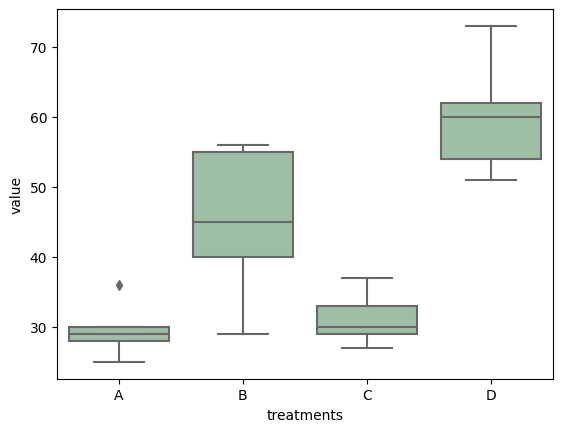

In [7]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments

import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
plt.show()

## ANOVA Analysis

In [10]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
# Significance level is 0.05
alpha = 0.05
print(f"F statistic is: {fvalue} and pvalue is {pvalue}. Significance level is {alpha}.")
if pvalue <= alpha:
    print("Reject H0.")
else:
    print("Fail to reject H0.")

F statistic is: 17.492810457516338 and pvalue is 2.6392411462109217e-05. Significance level is 0.05
Reject H0.


# 15.2 Multiple comparison

## Tukey-Kramer (T-K) multiple comparisons procedure

The T-K procedure is based on calculating confidence intervals for the difference between each possible pair of $\mu$’s.  After all confidence intervals have been calculated, each is examined to determine whether the interval includes 0. 
- If a particular interval does not include 0, the two means are declared “significantly different” from one another.
- An interval that does include 0 supports the conclusion that there is no significant difference between the means involved. 

The T-K intervals are based on critical values for a probability distribution called the Studentized range distribution (https://en.wikipedia.org/wiki/Studentized_range_distribution). 

Procedure:
- When there are 𝑘 populations or treatments being compared, 𝑘(𝑘−1)/2 confidence intervals are calculated.
- Denoting the relevant Studentized range critical value (from Appendix Table 7) by 𝑞, the intervals are as follows: 
$$
\mu_i - \mu_j : (\overline{x}_i - \overline{x}_j) \pm \sqrt{\frac{MSE}{2} (\frac{1}{n_{i}} \pm \frac{1}{n_{j}}) }
$$
and two means are judged to be significantly different if the corresponding interval does not include zero. 

In [12]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

c:\Users\Xiaoyu Huang\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


except A-C, all other pairwise comparisons for treatments rejects null hypothesis (p < 0.05)